In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Домашнее задание к лекции  «Корреляция и корреляционный анализ»** 

 Возьмите датасет Mortality and Water Hardness
 
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1. 
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


**Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [2]:
water_mort = pd.read_csv('water.csv', index_col=0)

In [3]:
water_mort

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


In [4]:
water_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [5]:
water_mort.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Создадим функции для определения коэффициентов, вывода графиков и построения модели регрессии.

In [6]:
def plot_corr(dataframe):
    pearson = dataframe.corr()
    spearman = dataframe.corr(method='spearman')
    
    print(f'Коэффициент корреляции Пирсона:\n{pearson}')
    print(f'\nКоэффициент корреляции Спирмена:\n{spearman}')
    
    dataframe.plot(x='hardness',
                   y='mortality',
                   kind='scatter',
                   title='Взаимосвязь жесткости воды и смертности',
                   xlabel='Жесткость воды',
                   ylabel='Смертность')

In [7]:
def model_determ(dataframe):
    X = dataframe[['hardness']]
    y = dataframe['mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=815)

    model = LinearRegression() # инициализация модели
    model.fit(X_train, y_train) # обучение модели
    y_pred = model.predict(X_test)
    determ = model.score(X_test, y_test)
    residuals = y_test - y_pred

    print(f'Коэффициент детерминации: {round(determ, 2)}')
    
    plt.scatter(residuals, y_pred)
    plt.title('График остатков')
    plt.show()

Теперь можно применить их сначала на общем датафрейме.

Коэффициент корреляции Пирсона:
           mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000

Коэффициент корреляции Спирмена:
           mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


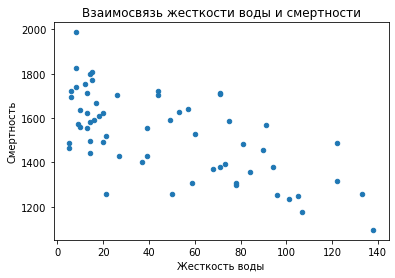

In [8]:
plot_corr(water_mort)

Коэффициент детерминации: 0.53


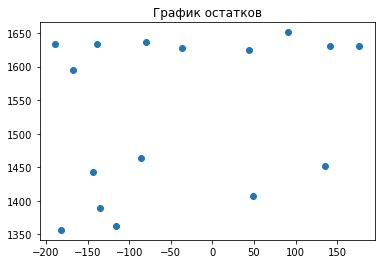

In [9]:
model_determ(water_mort)

Вывод:

Коэффициент детерменации - 0.53, средний. При анализе остатков не прослеживается систематической составляющей, распределены достаточно хаотично.

Между жесткостью воды и смертностью наблюдается умеренная отрицательная корреляция, коэффициенты корреляции Пирсона и Спирмена показывают похожие результаты.

Разделим данные для проверки зависимости на разных регионах: северного и южного.

In [10]:
wat_mor_north = water_mort.loc[ water_mort['location'] == 'North' ]
wat_mor_south = water_mort.loc[ water_mort['location'] == 'South' ]

Коэффициент корреляции Пирсона:
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

Коэффициент корреляции Спирмена:
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


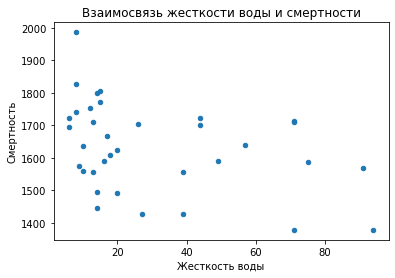

In [11]:
# север
plot_corr(wat_mor_north)

Коэффициент корреляции Пирсона:
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

Коэффициент корреляции Спирмена:
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


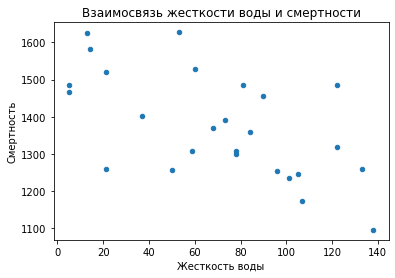

In [12]:
# юг
plot_corr(wat_mor_south)

Коэффициент детерминации: 0.03


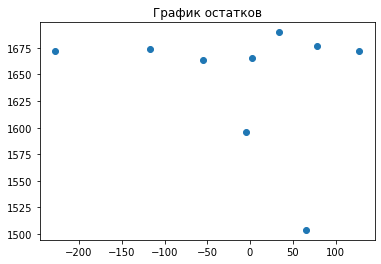

In [13]:
model_determ(wat_mor_north)

Коэффициент детерминации: 0.17


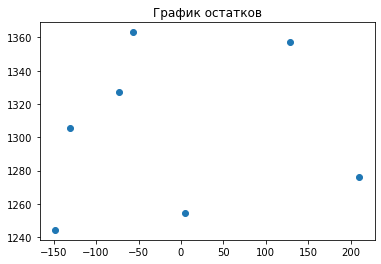

In [14]:
model_determ(wat_mor_south)

Выводы:
Количество данных при разделении на регионы уменьшилось, коэффициент детерминации сильно изменился и приблизился к нулю для обоих регионов, сложно сделать однозначные выводы на основании этих показателей.

При этом коэффициенты корреляции так же уменьшились, но не так сильно, здесь связь все еще сохраняется. Для южных городов корелляция осталась почти на таком же уровне, но для северных городов она стала значительно меньше.